### Задание.

* Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
* Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
* Разделите данные на выборку для обучения и тестирования
* Постройте модель LDA
* Визуализируйте предсказания для тестовой выборки и центры классов
* Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
* Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [60]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [22]:
df = pd.read_csv('C:\\Users\\HP\\Desktop\\DataAnalitics\\Python\\Notebook\\dop material\\iris.csv', sep=',')

In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety,variety_num
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


In [46]:
# Оставляем два признака - sepal_length и sepal_width и целевую переменную - variety
df_iris = df[['sepal_length', 'sepal_width', 'variety', 'variety_num']]
df_iris.head()

,sepal_length,sepal_width,variety,variety_num
0,5.1,3.5,Setosa,0
1,4.9,3.0,Setosa,0
2,4.7,3.2,Setosa,0
3,4.6,3.1,Setosa,0
4,5.0,3.6,Setosa,0


In [26]:
# Функции для разделения данных
from sklearn.model_selection import train_test_split

In [47]:
X, y = df_iris[['sepal_length', 'sepal_width']], df_iris['variety_num']

In [48]:
# Разделяем данные на данные для обучения и тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [50]:
# строим модель LDA
lda = LinearDiscriminantAnalysis()

In [51]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [52]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 2,
       1, 0, 2, 0, 2, 1, 0, 1], dtype=int64)

In [53]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,variety_num,Unnamed 0
74,1.0,NaN
99,1.0,NaN
82,1.0,NaN
29,0.0,1.0
130,2.0,NaN
93,1.0,NaN
48,0.0,NaN
81,1.0,NaN
35,0.0,NaN
92,1.0,NaN


In [54]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.9333333333333333

In [55]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-6.26864053,  7.87012687],
       [ 2.28397992, -4.02639633],
       [ 4.24756577, -4.14408586]])

In [56]:
# посмотрим на наши центроиды
lda.means_

array([[5.00487805, 3.42926829],
       [5.9975    , 2.775     ],
       [6.4974359 , 2.96410256]])

<ipython-input-61-74faf26a28fa>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


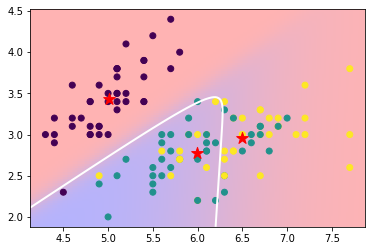

In [61]:
# Визуализируем предсказания для тестовой выборки и центры классов - scatter plot
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train)

# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

# Кластеризация

In [64]:
from sklearn.cluster import KMeans

In [65]:
# указываем количество кластеров 
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_train)
clusters

array([1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1, 2,
       0, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0,
       1, 2, 2, 0, 2, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2,
       1, 1, 0, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 2, 1,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 0])

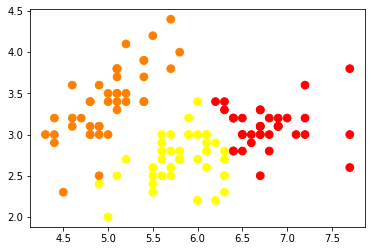

In [68]:
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], cmap='autumn', c=clusters, s=60)

In [69]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_train)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

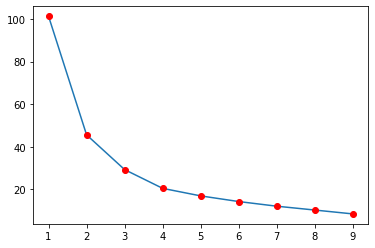

In [70]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [71]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

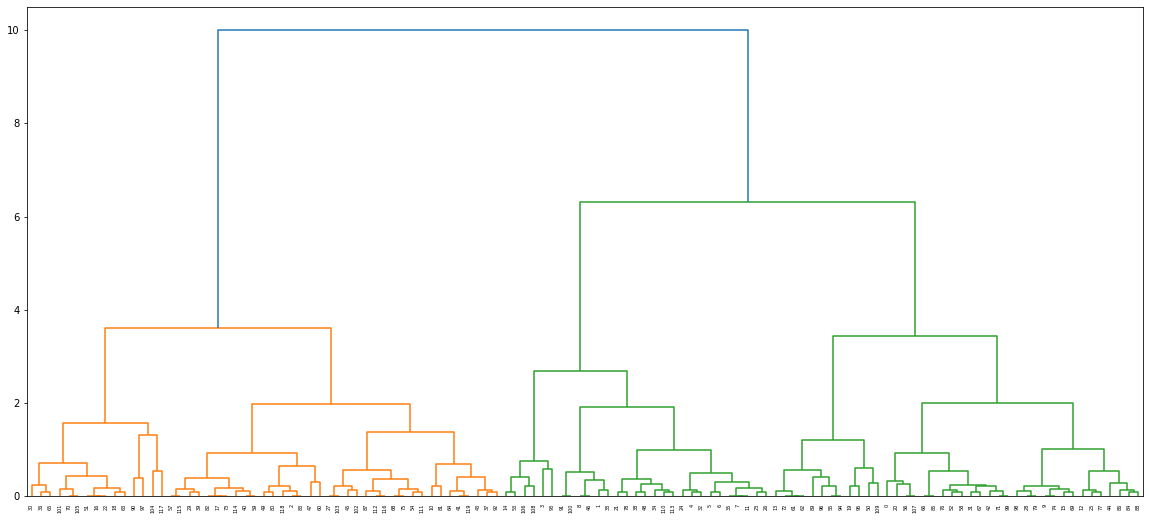

In [72]:
# строим дендрограмму
distance_mat = pdist(X_train) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) 
# linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [73]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [81]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_train)
clusters

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

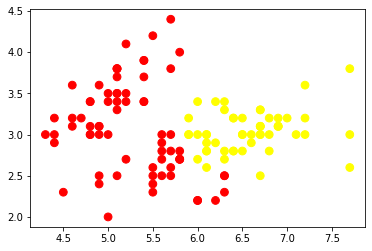

In [82]:
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], cmap='autumn', c=clusters, s=60)